<a href="https://colab.research.google.com/github/Kwamenas/Jovian-Tutorial-Session/blob/main/Jovian_Linear_Regression_with_ScikitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

This tutorial takes a practical and coding-focused approach. We'll define the terms _machine learning_ and _linear regression_ in the context of a problem, and later generalize their definitions. We'll work through a typical machine learning problem step-by-step:


> **QUESTION**: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, **you're tasked with creating an automated system to estimate the annual medical expenditure for new customers**, using information such as their age, sex, BMI, children, smoking habits and region of residence. 
>
> Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.
> 
> You're given a [CSV file](https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv) containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers. 
> <img src="https://i.imgur.com/87Uw0aG.png" width="480">
>
> Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets


**EXERCISE**: Before proceeding further, take a moment to think about how can approach this problem. List five or more ideas that come to your mind below:
 
 1. ???
 2. ???
 3. ???
 4. ???
 5. ???



In [1]:
#this is for our data analysis
import pandas as pd
import numpy as np
from pandas import DataFrame,Series

#for our data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


We are now going to download this dataset, we have been provided with a url



In [2]:

from urllib.request import urlretrieve

url_path='https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'


urlretrieve(url_path,'medical.csv')



('medical.csv', <http.client.HTTPMessage at 0x7fe27c1a5fd0>)

In [3]:
#Now lets put this into a pandas data frame

medical_df=pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500




**Our Goal :** our  task is creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Our data set has 1338 rows and 7 columns. Each row has customer information.

Now lets check the data type of the columns.



In [4]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We can see that sex,smoker and region column can be categorical columns.

Age,bmi,children,charges column can be numerical columns.

From our data we do not have to deal with missing values.

This looks like a kinda of clean data.

WOW



So now lets describe this data and see what it entails

In [5]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
sns.set_style('darkgrid')

In [7]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**AGE**:

We will look at the age column and explore it. From our intital exploration,the min age was 18 and max age was 64. so now lets get a histogram and explore this


Text(0.5, 1.0, 'Age Distribution')

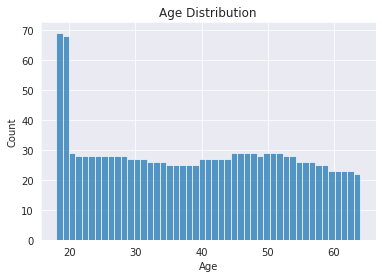

In [8]:
sns.histplot(data=medical_df,x='age',bins=47)
plt.xlabel('Age')
plt.title('Age Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


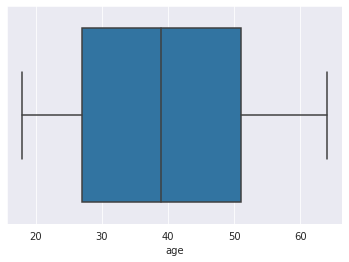

In [9]:
sns.boxplot(medical_df['age'])

From our visualization we see that our age distribution was slightly uniform.With exception of customers who fall in the age of 18 and 19.
these customers were many.

Reasons: Assumption 1 is our insurance company inital board on fee is affordable hence more people of that age group subscribing.

Assumption 2: We can say that you have to be 18 years before you can subscribe to this insurance


**BMI**

Text(0.5, 1.0, 'BMI Distribution')

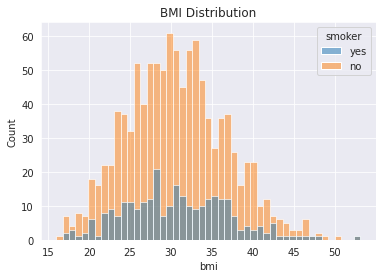

In [10]:
sns.histplot(data=medical_df,x='bmi',bins=47,hue='smoker')
plt.xlabel('bmi')
plt.title('BMI Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


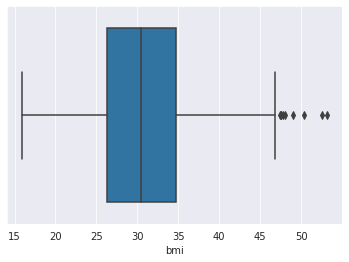

In [11]:
sns.boxplot(medical_df['bmi'])

For the BMI distribution, we see that most of the distribution forms a bell shape, and most of the bmi of our clients are within 25-40. So we see that we have a gaussian distribution.

Also when we do check the box plot, we realise we have some outliers. So we beed to deal with them.



**CHARGES**



Text(0.5, 1.0, 'charges Distribution')

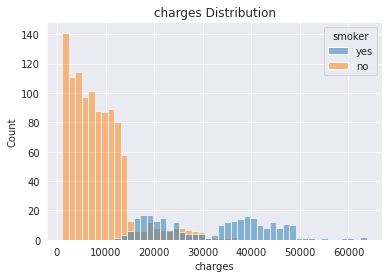

In [12]:
sns.histplot(data=medical_df,x='charges',bins=47,hue='smoker')
plt.xlabel('charges')
plt.title('charges Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


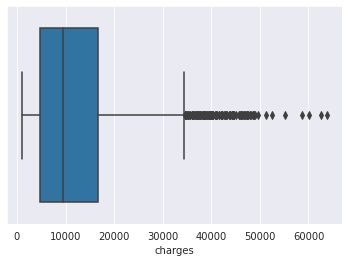

In [13]:
sns.boxplot(medical_df['charges'])

So we see that most of the customers spend $10,000 or less. A few spend more than that.This could be duw to other factors like accidents,illness etc.

for those who smoke and do not smoke there is a huge difference in them.


Text(0.5, 1.0, 'charges Distribution')

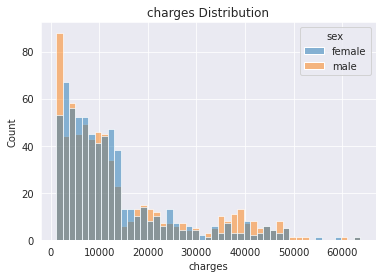

In [14]:
sns.histplot(data=medical_df,x='charges',bins=47,hue='sex')
plt.xlabel('charges')
plt.title('charges Distribution')

In [15]:
medical_df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

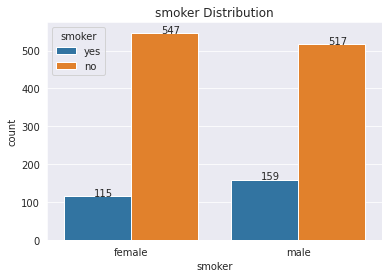

In [16]:
ax=sns.countplot(data=medical_df,x='sex',hue='smoker')
plt.xlabel('smoker')
plt.title('smoker Distribution')

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.18, p.get_height()+0.01))


Now we have done some individual exploration, and visualization. do not forget our goal:

**you're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.**

So we need to see how the other features and charges behave. to do this we use a scatterplot.



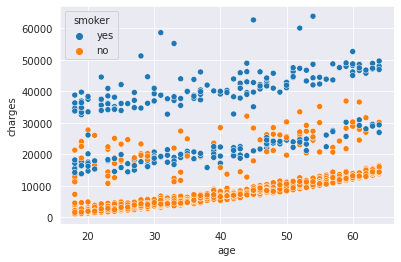

In [17]:
sns.scatterplot(x='age',y='charges',data=medical_df,hue='smoker')

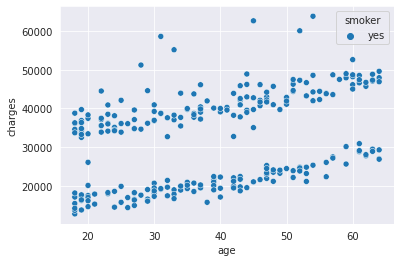

In [18]:
sns.scatterplot(x='age',y='charges',data=medical_df,hue=medical_df[medical_df['smoker']=='yes']['smoker'])

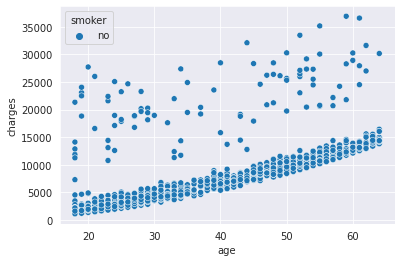

In [19]:
sns.scatterplot(x='age',y='charges',data=medical_df,hue=medical_df[medical_df['smoker']=='no']['smoker'])

So we realise that as we ages increase medical charges also increases. 
but the question is can we just base on that and say. if one is 70 years we need to pay more insurance.compared to when one is 18..... NO 

So we decided let's look at this with smokers in mind.

We got 3 clusters



*   The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
*   The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

*   he final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.










**BMI AND CHARGES**

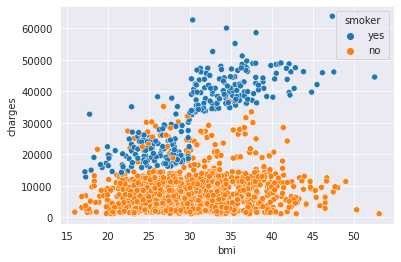

In [20]:
sns.scatterplot(x='bmi',y='charges',data=medical_df,hue='smoker')

SO we realise that for a non- smoker, BMI and charges have no relationship.

However for those who smoke they are correlated. Meaning Obesity and smoking will lead to more charges.

For the non numerical values we can use boxplot or violine plot to do our visualization with charges.


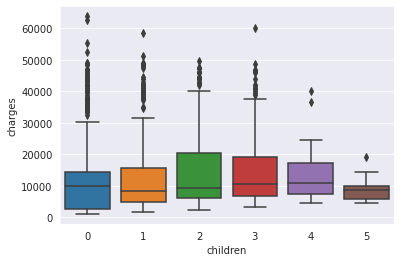

In [21]:
sns.boxplot(x='children',y='charges',data=medical_df)

In [22]:
medical_df.corr()['charges']

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

for the categorical values remeber we cannot do a correlation for them.
But with indepth knowledge of the domain, we realised smoking can cause high charges.
So it makes sense to convert smoking into numerical data.
We can use the map for we can decide to use apply 

In [23]:
def smoker_numeric(row):
  if row=='yes':
    return 1
  else:
    return 0

medical_df['smoker_numeric']=medical_df['smoker'].apply(lambda x:smoker_numeric(x))

In [24]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_numeric
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [25]:
medical_df.corr()['charges']

age               0.299008
bmi               0.198341
children          0.067998
charges           1.000000
smoker_numeric    0.787251
Name: charges, dtype: float64

Now we can see that smokers are highly correlated to the charges.

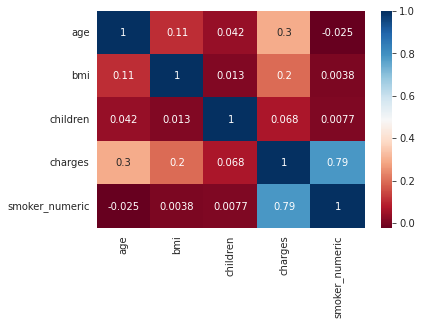

In [26]:
sns.heatmap(medical_df.corr(),cmap='RdBu',annot=True)

In [27]:
no_smokers=medical_df[medical_df['smoker']=='no'].drop(columns='smoker_numeric')

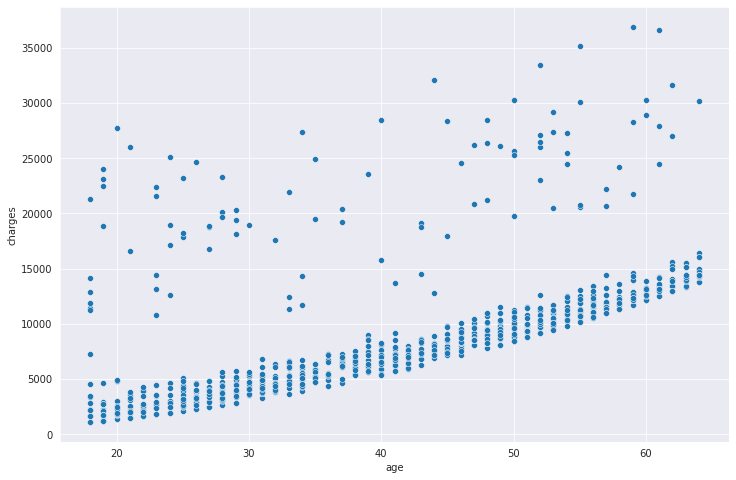

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='age',y='charges',data=no_smokers)

So we know that for a Linear Regression we are dealing with y=ax +b
a is the slope
b is the intercept
y is our out come

for us we will change it to charges=w*ages + b

this is a univariate LR hence we are using just one characteristic of our customer to make our prediction.

Lets go ahead and create a function which will help us create a validation map for our solution



In [29]:
def exstimate_charges(age,w,b):
  return w * age + b




In [30]:
w=50
b=100

In [31]:
exstimate_charges(40,w,b)

2100

Text(0, 0.5, 'estimated_charge')

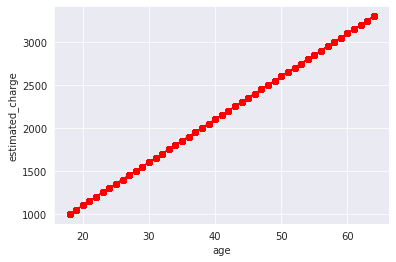

In [32]:
age=no_smokers.age
estimated_charge=exstimate_charges(age,w,b)

plt.plot(age,estimated_charge,'r-o')
plt.xlabel('age')
plt.ylabel('estimated_charge')

Text(0, 0.5, 'Charges')

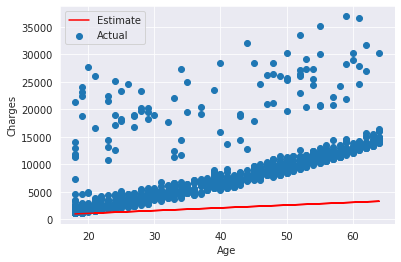

In [33]:
target=no_smokers.charges

plt.plot(age,estimated_charge,'r')

plt.scatter(age,target)

plt.legend(['Estimate','Actual'])

plt.xlabel('Age') 

plt.ylabel('Charges')

so clearly our model is bad so lets get a function that does this for us 
all we need to change is w and b 


In [34]:
def try_parameters(w,b):
  target=no_smokers.charges
  age=no_smokers.age
  
  estimated_charge=exstimate_charges(age,w,b)


  plt.plot(age,estimated_charge,'r')
  plt.scatter(age,target)
  plt.legend(['Estimate','Actual'])
  plt.xlabel('Age') 
  plt.ylabel('Charges')



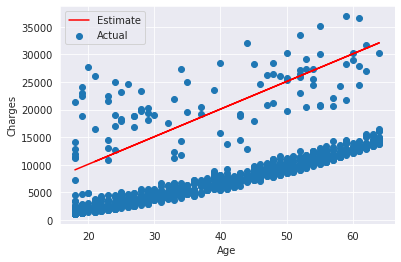

In [35]:
try_parameters(500,100)

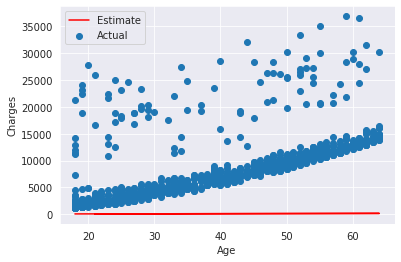

In [36]:
try_parameters(2.1,5)

The loss function we are using is the RMSE
lets use code to understand this 

In [37]:
def rmse(target,predicted):
  return np.sqrt(np.mean(np.square(target-predicted)))

In [38]:
target=no_smokers.charges
predicted=exstimate_charges(no_smokers.age,w,b)

In [39]:
rmse(target,predicted)

8461.949562575488

Here's how we can interpret the above number: On average, each element in the prediction differs from the actual target by $8461.

The result is called the loss because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.

Let's modify the try_parameters functions to also display the loss.


In [40]:
def try_parameters(w,b):
  target=no_smokers.charges
  age=no_smokers.age
  
  estimated_charge=exstimate_charges(age,w,b)


  plt.plot(age,estimated_charge,'r')
  plt.scatter(age,target)
  plt.legend(['Estimate','Actual'])
  plt.xlabel('Age') 
  plt.ylabel('Charges')
  
  #loss=rmse(target,estimated_charge)
  loss=np.sqrt(mean_squared_error(target,estimated_charge))

  print('RMSE loss:',loss)


NameError: ignored

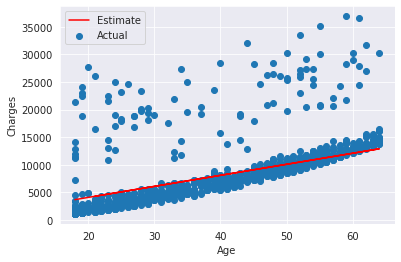

In [41]:
try_parameters(200,109)

In [42]:
#for our ML we will use Linear Regression
#and we need to import our model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,SGDRegressor
model=LinearRegression()


In [43]:
input=no_smokers[['age']]
target=no_smokers['charges']
model.fit(input,target)
predicted=model.predict(input)

rmse=np.sqrt(mean_squared_error(target,predicted))

In [ ]:
print('w,slope',model.coef_)
print('b, intercept',model.intercept_)

RMSE loss: 4662.505766636395


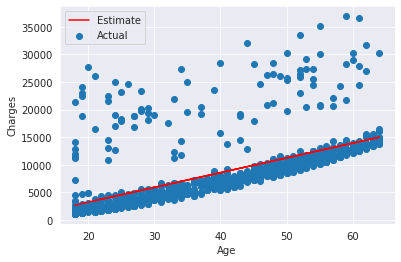

In [44]:
try_parameters(model.coef_, model.intercept_)

We are going to use SGDRegressor this will help us to understand regularization in Linear Regression

In [45]:
sgd_model=SGDRegressor()
sgd_model.fit(input,target)
predictions=sgd_model.predict(input)
rmse_sgd= np.sqrt(mean_squared_error(target,predictions))
rmse_sgd



4842.688216793178

In [46]:
smokers_df=medical_df[medical_df.smoker=='yes'].drop(columns='smoker_numeric')

def try_parameters_smokers(w,b):
  target=smokers_df.charges
  age=smokers_df.age
  
  estimated_charge=exstimate_charges(age,w,b)


  plt.plot(age,estimated_charge,'r')
  plt.scatter(age,target)
  plt.legend(['Estimate','Actual'])
  plt.xlabel('Age') 
  plt.ylabel('Charges')

  loss=np.sqrt(mean_squared_error(target,estimated_charge))
  print('RMSE loss:',loss)


In [47]:
input=smokers_df[['age']]
target=smokers_df['charges']

model.fit(input,target)
predicted_smokers=model.predict(input)
rmse_smokers=np.sqrt(mean_squared_error(target,predicted_smokers))

rmse_smokers

10711.00334810241

**Multi Features**

In [48]:
input=no_smokers[['age','bmi']]
target=no_smokers['charges']

model=LinearRegression()
model.fit(input,target)
predictables=model.predict(input)
np.sqrt(mean_squared_error(target,predictables))

4662.3128354612945

In [49]:
(model.coef_,model.intercept_)

(array([266.87657817,   7.07547666]), -2293.6320906488727)

BMI did not create any major impact as it's poorly correlated with charges


In [50]:
input=no_smokers[['age','bmi','children']]
target=no_smokers['charges']

model=LinearRegression()
model.fit(input,target)
predictables=model.predict(input)
np.sqrt(mean_squared_error(target,predictables))

4608.470405038247

In [51]:
input=smokers_df[['age','bmi','children']]
target=smokers_df['charges']

model=LinearRegression()
model.fit(input,target)
predictables=model.predict(input)
np.sqrt(mean_squared_error(target,predictables))


5718.2024805241535

In [52]:

input=medical_df[['age','bmi','children']]
target=medical_df['charges']

model=LinearRegression()
model.fit(input,target)
predictables=model.predict(input)
np.sqrt(mean_squared_error(target,predictables))

11355.317901125973

**Categorical Columns **:

We need to look at using categorical columns.
We need to convert them to numbers.

We can do this using 3 ways.

1. Is the category a binary category thus are the value counts just two variables. eg: yes or no. for that we can replace them with 0 and 1 hence the name binary.

2. If our category has more than one distinct values we can use the one-hot coding.Here we will create a new column for those categories and replace them with 0 and 1

3. Also if the category is in a natural order. instead of using one hot to change them to 0 and 1, we can decide to use 1,2,3,4 to put them in an orderly form .

In [53]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_numeric
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [54]:
medical_df=medical_df.drop(columns='smoker_numeric')

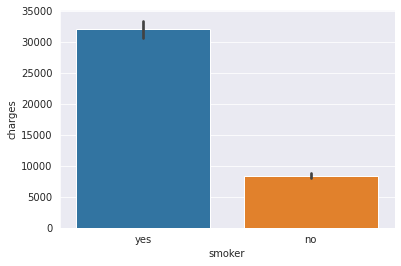

In [55]:
sns.barplot(data=medical_df,x='smoker',y='charges')

In [56]:
smoker_codes={'yes':1,'no':0}
medical_df['smoker_code']=medical_df['smoker'].map(smoker_codes)

In [57]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [58]:
medical_df.corr()['charges']

age            0.299008
bmi            0.198341
children       0.067998
charges        1.000000
smoker_code    0.787251
Name: charges, dtype: float64

In [59]:
input=medical_df[['age','bmi','children','smoker_code']]
target=medical_df['charges']

model=LinearRegression()
model.fit(input,target)
predictables=model.predict(input)
np.sqrt(mean_squared_error(target,predictables))

6056.439217188081

In [60]:
medical_df.select_dtypes(include='object').nunique()

sex       2
smoker    2
region    4
dtype: int64

In [61]:
medical_df.sex

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [62]:
def sex_code(row):
  if row=='male':
    return 1
  else:
    return 0

medical_df['sex_code']=medical_df['sex'].apply(lambda x: sex_code(x))

In [63]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [64]:
medical_df.corr()['charges']

age            0.299008
bmi            0.198341
children       0.067998
charges        1.000000
smoker_code    0.787251
sex_code       0.057292
Name: charges, dtype: float64

In [65]:
input=medical_df[['age','bmi','children','smoker_code','sex_code']]
target=medical_df['charges']

model=LinearRegression()
model.fit(input,target)
predictables=model.predict(input)
np.sqrt(mean_squared_error(target,predictables))

6056.100708754546

**One Hot Encoder**

In [67]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_
one_hot=enc.fit_transform(medical_df[['region']]).toarray()


In [115]:
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [71]:
#tf=enc.transform(medical_df[['region']]).toarray()
DataFrame(one_hot,columns=enc.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_northeast,x0_northwest,x0_southeast,x0_southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
1333,0.0,1.0,0.0,0.0
1334,1.0,0.0,0.0,0.0
1335,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,1.0


Now lets add it to out dataframe

In [68]:
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [ ]:
reg_col=list(enc.categories_)

In [ ]:
enc.categories_

In [69]:
medical_df[['northeast','northwest','southeast','southwest']]=one_hot

In [70]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


In [72]:
medical_df.corr()['charges']

age            0.299008
bmi            0.198341
children       0.067998
charges        1.000000
smoker_code    0.787251
sex_code       0.057292
northeast      0.006349
northwest     -0.039905
southeast      0.073982
southwest     -0.043210
Name: charges, dtype: float64

In [73]:
input=medical_df[['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']]
target=medical_df['charges']
model=LinearRegression()
model.fit(input,target)
predictables=model.predict(input)
np.sqrt(mean_squared_error(target,predictables))

6041.6796511744515

In [79]:
input_cols=['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']
medical_df[input_cols].loc[10]

age            25.00
bmi            26.22
children        0.00
smoker_code     0.00
sex_code        1.00
northeast       1.00
northwest       0.00
southeast       0.00
southwest       0.00
Name: 10, dtype: float64

In [80]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [87]:
#first lets create a data frame which has the features  and their weight

weight_df=DataFrame(columns=['feature','weight'])
weight_df['feature']=input_cols
weight_df['weight']=model.coef_


In [91]:
df2 = {'feature': 1, 'weight': model.intercept_}
weight_df = weight_df.append(df2, ignore_index = True)

weight_df.sort_values(by='weight',ascending=False)

,feature,weight
3,smoker_code,23848.534542
5,northeast,587.009235
2,children,475.500545
1,bmi,339.193454
0,age,256.856353
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814
9,1.0,-12525.547811


While it seems like BMI and the "northeast" have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the "northeast" column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:

We can't compare the weights of different column to identify which features are important
A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.
For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

**SCALING**

In [92]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()



In [101]:
##now lets take the numeric values of medical_df
#medical_df.info()
numerical_values=['age','bmi','children']
medical_df[numerical_values]
scaler.fit(medical_df[numerical_values])



StandardScaler()

In [102]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [107]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [105]:
scaled_inputs=scaler.transform(medical_df[numerical_values])

In [127]:
DataFrame(scaled_inputs)

,0,1,2
0,-1.438764,-0.453320,-0.908614
1,-1.509965,0.509621,-0.078767
2,-0.797954,0.383307,1.580926
3,-0.441948,-1.305531,-0.908614
4,-0.513149,-0.292556,-0.908614
...,...,...,...
1333,0.768473,0.050297,1.580926
1334,-1.509965,0.206139,-0.908614
1335,-1.509965,1.014878,-0.908614
1336,-1.296362,-0.797813,-0.908614


In [123]:
medical_df.head()

cat_cols=['smoker_code','sex_code','northeast','northwest','southeast','southwest']

medical_df[cat_cols].values

cat_df=DataFrame(medical_df[cat_cols].values,columns=[cat_cols])

cat_df

,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
1333,0.0,1.0,0.0,1.0,0.0,0.0
1334,0.0,0.0,1.0,0.0,0.0,0.0
1335,0.0,0.0,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,0.0,0.0,1.0


In [131]:
scaled_df=DataFrame(scaled_inputs,columns=[numerical_values])

medical_df_scaled=pd.concat([scaled_df,cat_df],axis=1)

medical_df_scaled.head()

,age,bmi,children,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,-1.438764,-0.453320,-0.908614,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,-0.078767,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,1.580926,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,-0.908614,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,-0.908614,0.0,1.0,0.0,1.0,0.0,0.0


In [144]:
scale_inputs=medical_df_scaled.columns


In [161]:
input=medical_df_scaled[medical_df_scaled.columns]
target=medical_df['charges']
model=LinearRegression()
model.fit(input,target)
predictables=model.predict(input)
np.sqrt(mean_squared_error(target,predictables))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


6041.6796511744515

In [151]:
model.coef_

array([ 3607.47273619,  2067.69196584,   572.99820995, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [153]:
model.intercept_

8466.48321541183

In [162]:
DataFrame({'features':np.append(numerical_values + cat_cols,1 ),
'weight':np.append(model.coef_,model.intercept_)
    
})

,features,weight
0,age,3607.472736
1,bmi,2067.691966
2,children,572.998210
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,8466.483215


**TRAIN_TEST_SPLIT**


In [163]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(input,target,test_size=0.1)

model=LinearRegression()
model.fit(X_train,y_train)
predictables=model.predict(X_test)
np.sqrt(mean_squared_error(y_test,predictables))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


5878.364814302903

In [164]:

model=LinearRegression()
model.fit(X_train,y_train)
predictables=model.predict(X_train)
np.sqrt(mean_squared_error(y_train,predictables))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


6062.427324445455

How to Approach a Machine Learning Problem
Here's a strategy you can apply to approach any machine learning problem:

Set aside part of the training model.

Explore the data and find correlations between inputs and targets

Pick the right model, loss functions and optimizer for the problem at hand

Scale numeric variables and one-hot encode categorical data

Train the model

Make predictions on the test set and compute the loss